#### Question : What is the expected salary for a specific inustry based on company size?

___

#### Imports

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
# Load the datasets
postings = pd.read_csv('postings_cleaned.csv')
companies = pd.read_csv('companies_cleaned.csv')
company_industries = pd.read_csv('company_industries.csv')
industries = pd.read_csv('industries.csv') 

In [3]:
# Merge postings and companies on company_name
merged_data = postings.merge(companies, left_on='company_name', right_on='name', how='inner')
print(merged_data.head())


                                     company_name  \
0                           Corcoran Sawyer Smith   
1  Liberty Healthcare and Rehabilitation Services   
2                          The National Exemplar    
3                          Abrams Fensterman, LLP   
4  Liberty Healthcare and Rehabilitation Services   

                                               title  \
0                              Marketing Coordinator   
1                  Mental Health Therapist/Counselor   
2                        Assitant Restaurant Manager   
3  Senior Elder Law / Trusts and Estates Associat...   
4                                 Service Technician   

                                       description_x  max_salary pay_period  \
0  Job descriptionA leading real estate firm in N...        20.0     HOURLY   
1  At Aspen Therapy and Wellness , we are committ...        50.0     HOURLY   
2  The National Exemplar is accepting application...     65000.0     YEARLY   
3  Senior Associate Attorney

In [4]:
# Merge company_industries with merged_data on company_id
merged_data = merged_data.merge(company_industries, on='company_id', how='left')
print(merged_data[['company_size', 'industry', 'med_salary']].head())


   company_size                   industry  med_salary
0           2.0                Real Estate        25.5
1           5.0  Hospitals and Health Care        25.5
2           1.0                Restaurants        25.5
3           2.0               Law Practice        25.5
4           5.0  Hospitals and Health Care        25.5


In [5]:
final_data = merged_data[['company_size', 'industry', 'med_salary']].dropna()
# One-hot encode the industry column
final_data = pd.get_dummies(final_data, columns=['industry'], drop_first=True)
print(final_data.head())


   company_size  med_salary  industry_Administration of Justice  \
0           2.0        25.5                               False   
1           5.0        25.5                               False   
2           1.0        25.5                               False   
3           2.0        25.5                               False   
4           5.0        25.5                               False   

   industry_Advertising Services  industry_Airlines and Aviation  \
0                          False                           False   
1                          False                           False   
2                          False                           False   
3                          False                           False   
4                          False                           False   

   industry_Alternative Dispute Resolution  industry_Alternative Medicine  \
0                                    False                          False   
1                                 

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Select features for clustering
clustering_features = final_data[['company_size', 'med_salary']] 

# Normalize the features using StandardScaler
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  
final_data['cluster'] = kmeans.fit_predict(clustering_features_scaled)

# Evaluate the clustering
silhouette_avg = silhouette_score(clustering_features_scaled, final_data['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.7469129121274242


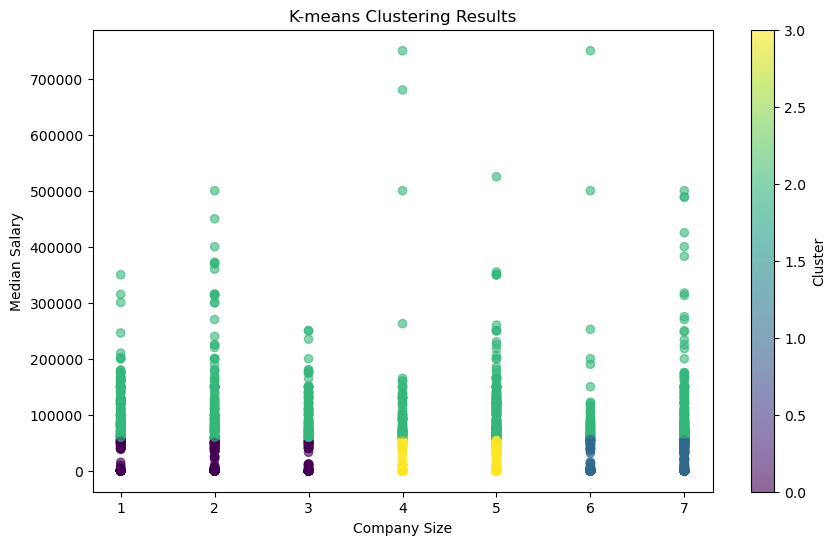

In [17]:

plt.figure(figsize=(10, 6))
plt.scatter(final_data['company_size'], final_data['med_salary'], c=final_data['cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster')
plt.xlabel('Company Size')
plt.ylabel('Median Salary')
plt.title('K-means Clustering Results')
plt.show()